In [1]:
import matplotlib.pyplot as plt
from stl import mesh

import trimesh

import numpy as np

import torch

In [2]:
def centroid(vertices, faces):

    vertices = torch.tensor(vertices)
    faces = torch.tensor(faces)

    center = vertices[faces].sum(dim=0) / 4

    volume = (
        vertices[faces[0, :]]
        * vertices[faces[1, :]].cross(
            vertices[faces[2, :]], dim=1
        )
    ).sum(dim=1)

    return (volume.unsqueeze(1).mul(center).sum(dim=0) / volume.sum(dim=0)).numpy()


In [3]:
max_range = 2000

gt_run = 'exp_memory_fix_long_pf_1'
runs = ['exp_memory_fix_long_pf_1', 'exp_memory_fix_pf_adamvector_3', 'exp_memory_fix_pf_k200v2_2', 'exp_memory_fix_pf_k300_0', 'exp_memory_fix_pf_k300_gs_0', 'exp_memory_fix_long_100v2_2', 'exp_memory_fix_long_100v2_1']

In [12]:
runs = ['exp_memory_fix_pf_adamvector_3', 'exp_memory_fix_pf_k200v2_2',  'exp_memory_fix_pf_k200v2_3', 'exp_memory_fix_long_100v2_1', 'exp_memory_fix_long_pf_fixedv2_1']

runs = ['exp_memory_fix_pf_k200v2_2',  'exp_memory_fix_pf_k200v2_3', 'exp_memory_fix_long_pf_fixedv2_1', 'exp_center_totv6_test_1']

exp_memory_fix_long_pf_1 1960


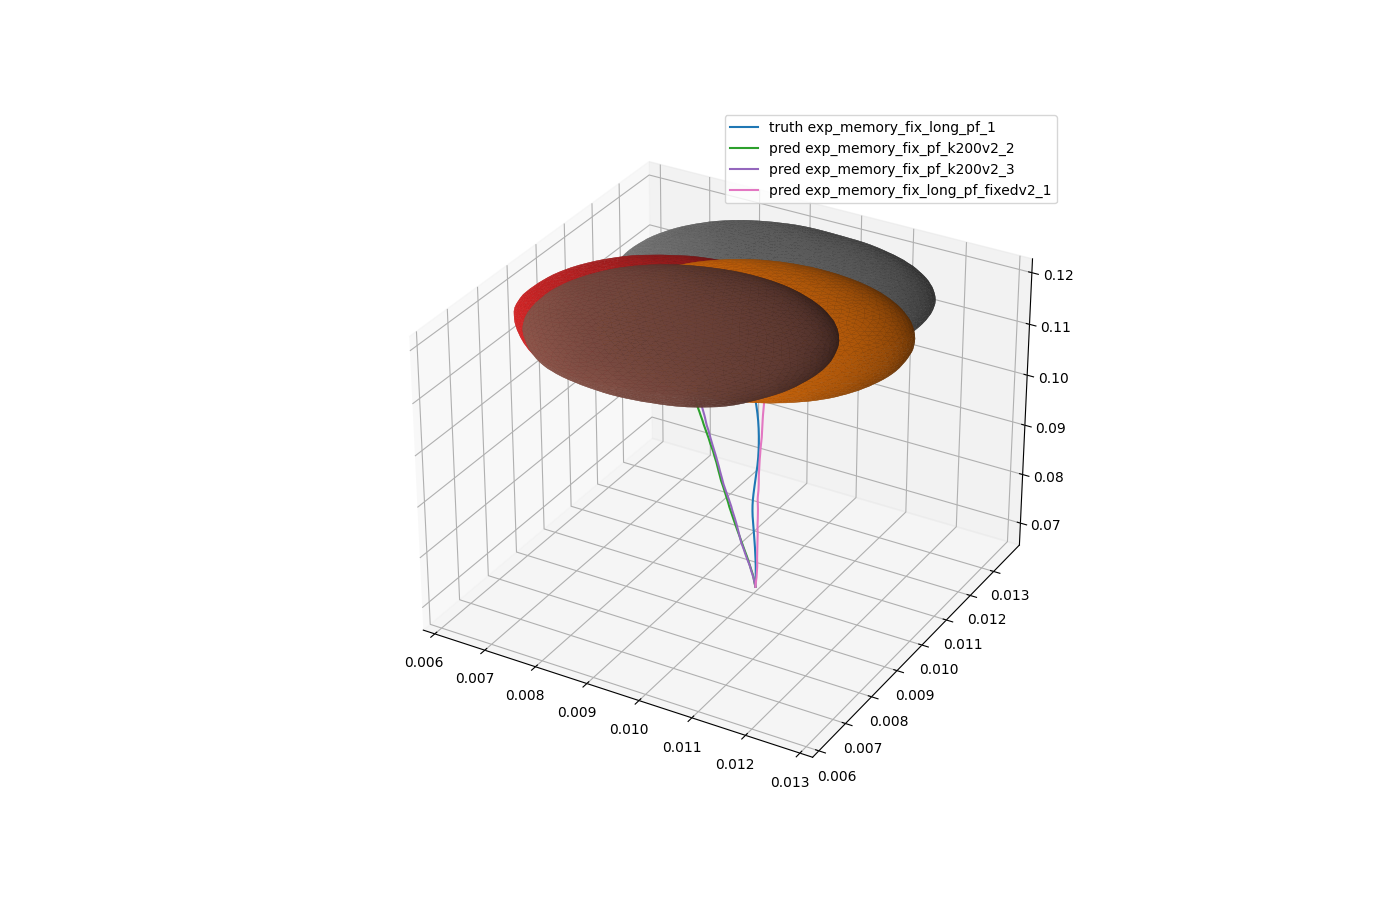

In [13]:
%matplotlib widget


def get_pos_and_last_mesh(file_name, type='pred'):
    all_mesh_verticess = []

    last_mesh = None

    for i in range(100, max_range, 10):
     
        try:
            mesh = trimesh.load_mesh(f'./results/{file_name}/{type}_{i}.stl')
            mesh_vertices = mesh.vertices
            # print(centroid(mesh_vertices, mesh.faces).shape)
            all_mesh_verticess.append(centroid(mesh_vertices, mesh.faces.T))
            last_mesh = mesh
            
        except Exception:
            print(file_name, i)
            break

    return np.array(all_mesh_verticess), last_mesh


def plot_traj_and_bubble(file_name, ax, type='pred'):
    all_mesh_vertices, mesh = get_pos_and_last_mesh(file_name, type)
    # print(all_mesh_vertices)
    
    ax.plot(all_mesh_vertices[:, 0], all_mesh_vertices[:, 1], all_mesh_vertices[:, 2], label=f"{type} {file_name}")
    ax.plot_trisurf(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2],triangles=mesh.faces)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

plot_traj_and_bubble(gt_run,ax, type='truth')

for run in runs:

    plot_traj_and_bubble(run, ax)

plt.legend()
plt.show()